<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /tmp/pip-req-build-g3uytv5c
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-g3uytv5c
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install noise


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 kB 8.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
import numpy as np
from perlin_numpy import generate_perlin_noise_2d
import noise
from noise import pnoise2
from noise import snoise3
import tensorflow_addons as tfa
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

2023-08-01 00:29:07.548987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


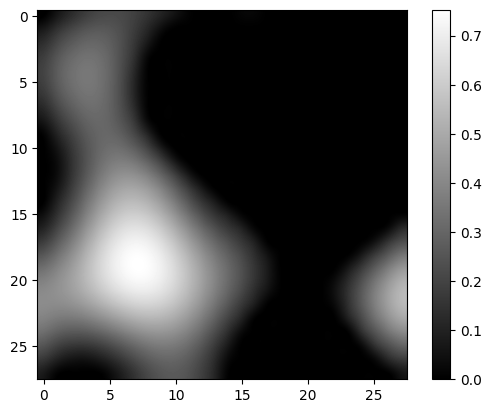

In [5]:
#np.random.seed(1)
noise = generate_perlin_noise_2d((28, 28), (2, 2))
noise = np.clip(noise,0,1)
plt.imshow(noise, cmap='gray', interpolation='lanczos')
plt.colorbar()

In [6]:


# Load MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [-1, 1]
#x_train = (x_train.astype("float32") - 127.5) / 127.5
#y_train = y_train.reshape(-1, 1)
x_train = (x_train.astype("float32")) / np.max(x_train)


# Example usage
image_index = 0  # Index of the image you want to retrieve
image = x_train[image_index]
print(image.shape)
print(x_train.shape[0])


(28, 28)
60000


In [7]:
print(np.max(x_train))

1.0


In [178]:
x_train2 = x_train[:500]
y_train2 = y_train[:500]

In [161]:
class AddNoiseLayer(tf.keras.layers.Layer):
    def __init__(self, stddev, probability, **kwargs):
        super(AddNoiseLayer, self).__init__(**kwargs)
        self.stddev = stddev
        self.probability = probability

    def call(self, inputs, training=True):
        if training:

            if tf.random.uniform(()) < self.probability:
                perlin = generate_perlin_noise_2d((28, 28), (2, 2))
                perlin = tf.convert_to_tensor(perlin, dtype=tf.float32)
                perlin = tf.clip_by_value(perlin, 0, 1)
                perlin = tf.reshape(perlin, (28, 28, 1))
                noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
                output = inputs + noise * perlin
                return tf.clip_by_value(output, 0, 1)
            else:
                return inputs
        return inputs

In [162]:
class AddNoiseLayertest(tf.keras.layers.Layer):
    def __init__(self, stddev=.5, **kwargs):
        super(AddNoiseLayertest, self).__init__(**kwargs)
        self.stddev = stddev

    def call(self, inputs, training=None):
        if training:

              perlin = generate_perlin_noise_2d((28, 28), (2, 2))
              perlin = tf.convert_to_tensor(perlin, dtype=tf.float32)
              perlin = tf.clip_by_value(perlin, 0, 1)
              perlin = tf.reshape(perlin, (28, 28, 1))
              noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
              output = inputs + noise * perlin
              return tf.clip_by_value(output, 0, 1)
        return inputs

In [163]:
def perlin_comp(shape,prob):
  if np.random.rand() < prob:
    perlin = generate_perlin_noise_2d((shape), (2, 2))
    output = np.expand_dims(perlin, axis=-1)
  else:
    output = np.zeros((28, 28, 1))
  return output


class AddNoiseLayer(tf.keras.layers.Layer):
    def __init__(self,stddev, probability, **kwargs):
        super(AddNoiseLayer, self).__init__(**kwargs)
        self.stddev = stddev
        self.probability = probability

    def call(self, inputs, training=True):
        if training:
            stacked_perlin = np.stack([perlin_comp((28,28),self.probability) for _ in range(inputs.shape[0])], axis=0)
            perlin = tf.convert_to_tensor(stacked_perlin, dtype=tf.float32)
            perlin = tf.clip_by_value(perlin, 0, 1)
            noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
            output = noise * perlin
            return tf.clip_by_value(inputs+output, 0, 1)
        else:
            return inputs

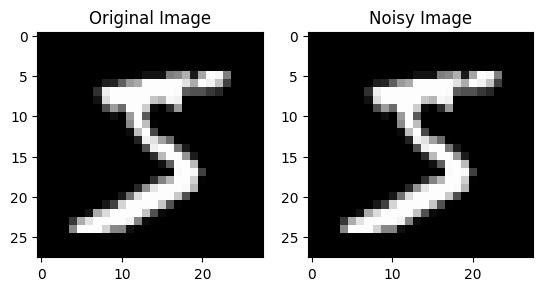

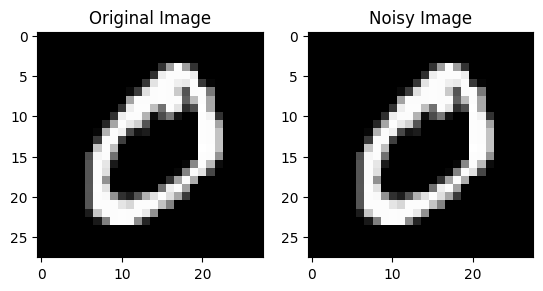

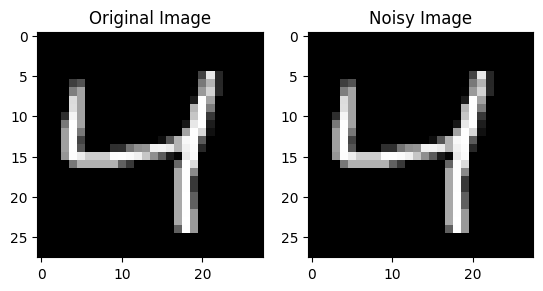

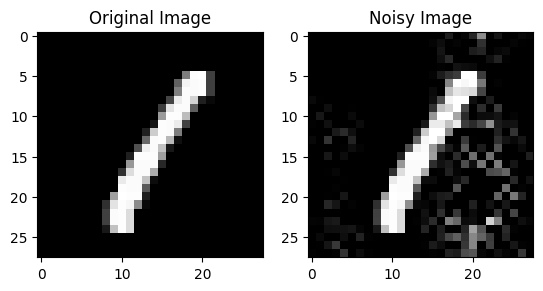

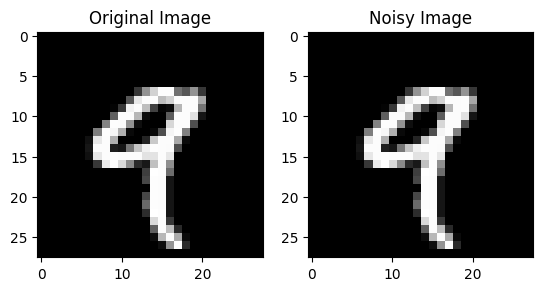

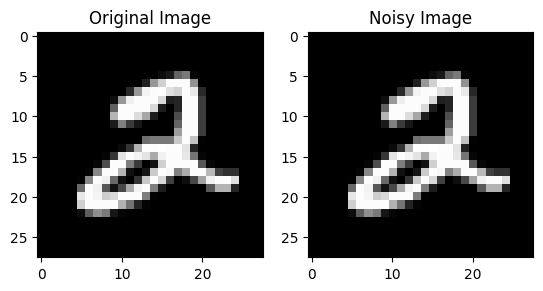

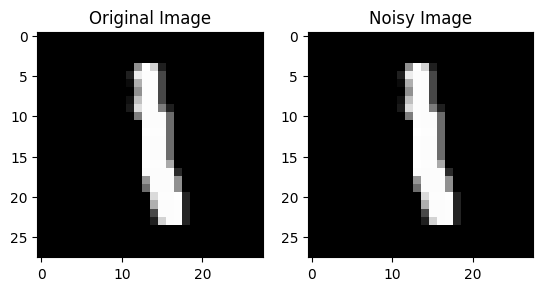

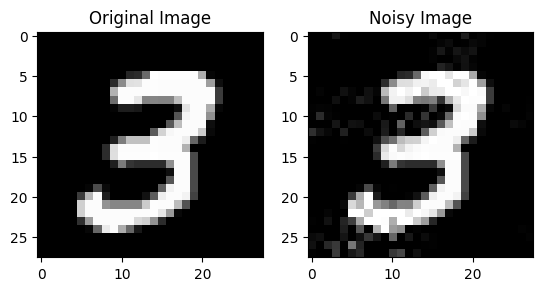

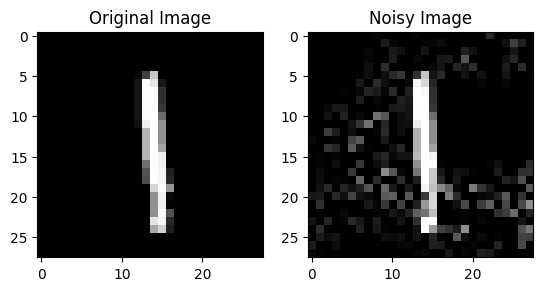

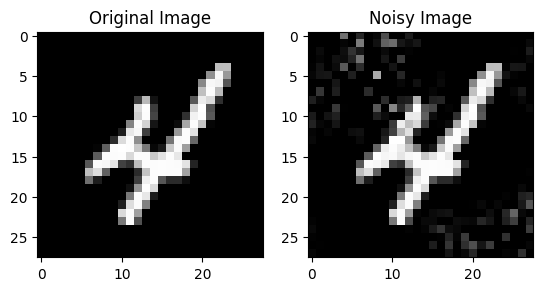

(10, 28, 28, 1)


In [164]:
# Create a random 28x28 image tensor
image = x_train[0:10]
image = np.expand_dims(image,-1)
# Instantiate the RandomNoiseLayer
GaussianPerlinNoiseLayer = AddNoiseLayer(.5,.5)

# Pass the image through the layer
noisy_image = GaussianPerlinNoiseLayer(image,training=True)

# Display the original and noisy images
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(1, 2, 1)
  plt.imshow(np.squeeze(image[i]), cmap='gray')  # Display the original image
  plt.title('Original Image')
  plt.subplot(1, 2, 2)
  plt.imshow(np.squeeze(noisy_image[i]), cmap='gray')  # Display the noisy image
  plt.title('Noisy Image')
  plt.show()

print(noisy_image.shape)

In [165]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.filters = filters
        self.strides = strides
        self.activation = tf.keras.activations.get(activation)

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')
        self.shortcut_bn = tf.keras.layers.BatchNormalization()

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        shortcut = self.shortcut(inputs)
        shortcut = self.shortcut_bn(shortcut, training=training)

        x = tf.keras.layers.add([x, shortcut])
        x = self.activation(x)

        return x

In [166]:
class CustomFullAug(tf.keras.layers.Layer):
    def __init__(self, probability=.2,rot_factor=.2,height=.2,width=.2,stdev=.2):
        super(CustomFullAug, self).__init__()
        self.probability = probability

        self.rot_factor = rot_factor
        self.height = height
        self.width = width
        self.stdev = stdev
        self.flip_layer = tf.keras.layers.RandomFlip()
        self.zoom_layer = tf.keras.layers.RandomZoom(height_factor=height,width_factor=width)
        self.rotation_layer = tf.keras.layers.RandomRotation(factor=rot_factor)
        self.noise_layer = AddNoiseLayertest()

    def call(self, inputs=.2, training=True):
        if tf.random.uniform(()) < self.probability:
            #flipped_data = self.flip_layer(inputs, training=training)
            rotated_data = self.rotation_layer(inputs, training=training)
            zoomed_data = self.zoom_layer(rotated_data, training=training)
            noised = self.noise_layer(zoomed_data, training=training)
            return noised
        else:
            return inputs

In [167]:

class CustomFlipLayer(tf.keras.layers.Layer):
    def __init__(self, probability):
        super(CustomFlipLayer, self).__init__()
        self.probability = probability
        self.flip_layer = tf.keras.layers.RandomFlip()

    def call(self, inputs=.2, training=True):
        if tf.random.uniform(()) < self.probability:
            flipped_data = self.flip_layer(inputs, training=training)
            return flipped_data
        else:
            return inputs

In [168]:
class CustomRotationLayer(tf.keras.layers.Layer):
    def __init__(self, probability, factor):
        super(CustomRotationLayer, self).__init__()
        self.probability = probability
        self.factor = factor
        self.rotation_layer = tf.keras.layers.RandomRotation(factor=factor)

    def call(self, inputs, training=True):
        if tf.random.uniform(()) < self.probability:
            rotated_data = self.rotation_layer(inputs, training=training)
            return rotated_data
        else:
            return inputs

In [169]:
class CustomZoomLayer(tf.keras.layers.Layer):
    def __init__(self, probability,height, width):
        super(CustomZoomLayer, self).__init__()
        self.probability = probability
        self.height = height
        self.width = width
        self.zoom_layer = tf.keras.layers.RandomZoom(height_factor=height,width_factor=width)

    def call(self, inputs, training=False):
        if tf.random.uniform(()) < self.probability:
            zoomed_data = self.zoom_layer(inputs, training=training)
            return zoomed_data
        else:
            return inputs

In [203]:
def build_generator():
    noise_shape = (100,)
    noise = layers.Input(shape=noise_shape)
    #noise_reshaped = layers.Flatten()(noise)
    input_digit = layers.Input(shape=(1,), dtype="int32")
    digit_embedding = layers.Embedding(10, 10)(input_digit)
    #digit_embedding = layers.Reshape((28, 28, 1))(digit_embedding)
    digit_embedding = layers.Flatten()(digit_embedding)
    

    x = layers.Concatenate()([noise, digit_embedding])
    
    x = layers.Dense(500)(x)
    x = layers.Dense(500)(x)
    x = layers.Dense(500)(x)
    x = layers.BatchNormalization()(x)
    

    
    x = layers.Dense(28 * 28,activation='sigmoid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Reshape((28,28,1))(x)
    x = layers.Activation('hard_sigmoid')(x)

    '''
    x = layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)


    x = layers.Conv2D(1, kernel_size=2, strides=1, padding='same', activation='sigmoid')(x)
    '''
    
    model = tf.keras.models.Model(inputs=[noise, input_digit], outputs=x)
    return model

generator = build_generator()
generator.summary()

Model: "model_57"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_125 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 embedding_42 (Embedding)       (None, 1, 10)        100         ['input_125[0][0]']              
                                                                                                  
 input_124 (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 flatten_40 (Flatten)           (None, 10)           0           ['embedding_42[0][0]']           
                                                                                           

In [204]:
from tensorflow.keras import regularizers
class ResnetBlock(layers.Layer):
    def __init__(self, filters, strides=1, l2_reg=0.01):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides

        self.conv1 = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', 
                                   kernel_regularizer=regularizers.l2(l2_reg))
        self.bn1 = layers.BatchNormalization()

        self.conv2 = layers.Conv2D(filters, (3, 3), strides=1, padding='same', 
                                   kernel_regularizer=regularizers.l2(l2_reg))
        self.bn2 = layers.BatchNormalization()

        if strides != 1:
            self.residual = layers.Conv2D(filters, (1, 1), strides=strides, 
                                          kernel_regularizer=regularizers.l2(l2_reg))
        else:
            self.residual = lambda x: x

    def call(self, inputs, training=False):
        res = self.residual(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)

        x += res
        return tf.nn.relu(x)

In [205]:

def build_discriminator():
    input_image = layers.Input(shape=(28, 28, 1))
    digit_input = layers.Input(shape=(1,), dtype="int32")
    digit_embedding_2d = layers.Embedding(10, 28*28)(digit_input)
    digit_embedding_2d = layers.Reshape((28, 28, 1))(digit_embedding_2d)

    #noise = AddNoiseLayer(stddev=0.2,probability=.1)(input_image)  # Pass the input image through the PerlinNoiseLayer
    #aug = CustomFullAug(probability=.01)(input_image)
    merged_input = layers.Concatenate()([input_image, digit_embedding_2d])

    x = ResnetBlock(64,2)(merged_input)
    x = layers.Dropout(.5)(x)
    x = ResnetBlock(64,2)(x)
    x = layers.Dropout(.5)(x)
    x = ResnetBlock(64,2)(x)
    x = layers.Dropout(.5)(x)
    x = ResnetBlock(64,2)(x)
    x = layers.Dropout(.5)(x)


    x = layers.Flatten()(x)
    x = layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.models.Model(inputs=[input_image, digit_input], outputs=x)
    return model

discriminator = build_discriminator()
discriminator.summary()

Model: "model_58"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_127 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 embedding_43 (Embedding)       (None, 1, 784)       7840        ['input_127[0][0]']              
                                                                                                  
 input_126 (InputLayer)         [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 reshape_46 (Reshape)           (None, 28, 28, 1)    0           ['embedding_43[0][0]']           
                                                                                           

In [206]:
# Define the GAN model
def build_gan(generator, discriminator):
    noise_shape = (100,)
    digit_shape = (1,)
    noise = layers.Input(shape=noise_shape)
    digit = layers.Input(shape=digit_shape)

    generated_image = generator([noise, digit])

    discriminator_output = discriminator([generated_image, digit])
    model = tf.keras.models.Model(inputs=[noise, digit], outputs=discriminator_output)
    return model

gan = build_gan(generator, discriminator)
gan.summary()




Model: "model_59"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_128 (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 input_129 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 model_57 (Functional)          (None, 28, 28, 1)    954520      ['input_128[0][0]',              
                                                                  'input_129[0][0]']              
                                                                                                  
 model_58 (Functional)          (None, 1)            282529      ['model_57[0][0]',        

In [207]:
# Compile models
generator_optimizer = tf.keras.optimizers.Adam(.004)
discriminator_optimizer = tf.keras.optimizers.Adam(.0001)

#generator_optimizer = tf.keras.optimizers.experimental.SGD(1e-4)
#discriminator_optimizer = tf.keras.optimizers.experimental.SGD(1e-4)

In [208]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy()(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy()(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy()(tf.ones_like(fake_output), fake_output)



In [209]:
def compute_ssim(images):
    combined_ssim = 0.0
    num_pairs = 0

    for i in range(len(images)):
        for j in range(i+1, len(images)):
            ssim = tf.image.ssim(images[i], images[j], max_val=1.0)
            combined_ssim += ssim
            num_pairs += 1

    if num_pairs > 0:
        combined_ssim /= num_pairs

    return combined_ssim

disc_loss 0.0424446315 gen_loss 5.67998028 ssim 0.128386334
disc_loss 0.113946378 gen_loss 6.37155581 ssim 0.0484486036
disc_loss 0.0357455723 gen_loss 6.276546 ssim -0.0849292427
disc_loss 0.0431714766 gen_loss 6.32623434 ssim -0.0225296766
disc_loss 0.0597497746 gen_loss 6.09530401 ssim 0.18905513
disc_loss 0.0705535263 gen_loss 6.36684322 ssim 0.0823499709
disc_loss 0.0852971375 gen_loss 6.41377544 ssim 0.122464679
disc_loss 0.0263437051 gen_loss 6.1388588 ssim 0.248979
disc_loss 0.0262406711 gen_loss 6.68757439 ssim 0.14797245
disc_loss 0.0582932979 gen_loss 6.27151442 ssim 0.0773071274
disc_loss 0.0572948083 gen_loss 6.50563717 ssim 0.174801797
disc_loss 0.0392068028 gen_loss 6.41141367 ssim -0.0212064609
disc_loss 0.023293782 gen_loss 6.32912493 ssim 0.048645
disc_loss 0.0204225741 gen_loss 6.49384642 ssim 0.244256094
disc_loss 0.0312405676 gen_loss 6.05547428 ssim 0.0474542864
disc_loss 0.0519696474 gen_loss 6.55945301 ssim 0.112767
disc_loss 0.0905688107 gen_loss 6.05484152 ssi

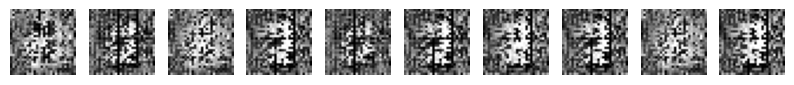

disc_loss 0.0418735668 gen_loss 6.6101985 ssim 0.0339859053
disc_loss 0.0438286066 gen_loss 6.66131115 ssim -0.0134165017
disc_loss 0.0387871638 gen_loss 6.37003374 ssim -0.0211274028
disc_loss 0.039274171 gen_loss 6.24038076 ssim -0.0163379014
disc_loss 0.0530200303 gen_loss 6.67917919 ssim -0.0502937548
disc_loss 0.0668440461 gen_loss 6.29535055 ssim 0.0889353901
disc_loss 0.0476370342 gen_loss 6.44708252 ssim 0.0247024056
disc_loss 0.046047233 gen_loss 6.77941036 ssim -0.0670940131
disc_loss 0.0205595512 gen_loss 6.06098557 ssim 0.0425843224
disc_loss 0.0275582708 gen_loss 6.60026932 ssim 0.17216368
disc_loss 0.0338894576 gen_loss 6.64006662 ssim 0.233506009
disc_loss 0.0378174335 gen_loss 6.49971294 ssim 0.173614621
disc_loss 0.0392609201 gen_loss 6.90555429 ssim -0.0134409787
disc_loss 0.020437073 gen_loss 6.56248236 ssim 0.199086696
disc_loss 0.0394208208 gen_loss 6.79894781 ssim 0.353781968
disc_loss 0.049184218 gen_loss 6.7533 ssim 0.242644399
disc_loss 0.0341416 gen_loss 6.428

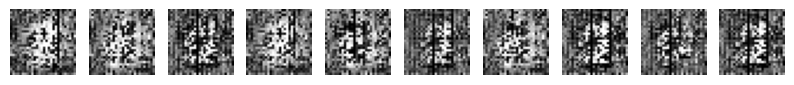

disc_loss 0.0165196173 gen_loss 6.53337145 ssim -0.076165244
disc_loss 0.0312233083 gen_loss 6.30941105 ssim 0.0142136635
disc_loss 0.0543437228 gen_loss 6.45577955 ssim 0.0141188502
disc_loss 0.0242732596 gen_loss 6.47733164 ssim 0.170124307
disc_loss 0.0423663557 gen_loss 6.51815844 ssim 0.143447593
disc_loss 0.0304457173 gen_loss 6.43359518 ssim 0.072802268
disc_loss 0.0738042071 gen_loss 6.49689817 ssim -0.00511205196
disc_loss 0.065598689 gen_loss 6.69909954 ssim 0.0668124333
disc_loss 0.0193391126 gen_loss 6.45952511 ssim -0.00564267347
disc_loss 0.0434264801 gen_loss 6.48823929 ssim -0.0106691299
disc_loss 0.0228219479 gen_loss 6.43859863 ssim 0.145753339
disc_loss 0.0427824035 gen_loss 6.26501703 ssim -0.00605756929
disc_loss 0.0366438 gen_loss 6.65592289 ssim 0.100716136
disc_loss 0.0369807854 gen_loss 6.77768135 ssim 0.871444702
disc_loss 0.0317431837 gen_loss 6.57543659 ssim 0.0658586547
disc_loss 0.0327728763 gen_loss 6.88060951 ssim 0.472320706
disc_loss 0.0303363092 gen_l

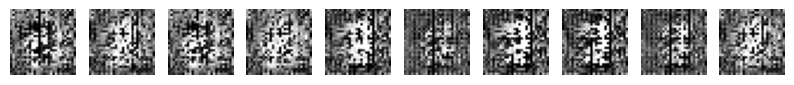

disc_loss 0.0285660103 gen_loss 6.29848862 ssim 0.0308448467
disc_loss 0.0352209657 gen_loss 6.98561335 ssim 0.0546838231
disc_loss 0.0215411801 gen_loss 6.59815025 ssim -0.00287924637
disc_loss 0.0407232791 gen_loss 6.26740217 ssim 0.594959438
disc_loss 0.0563830249 gen_loss 6.25465679 ssim 0.0535311922
disc_loss 0.0330076441 gen_loss 6.59770489 ssim 0.245785862
disc_loss 0.0278691947 gen_loss 6.67873478 ssim 0.0162246041
disc_loss 0.0205903221 gen_loss 6.33578444 ssim 0.151318461
disc_loss 0.0516278744 gen_loss 6.57478714 ssim 0.0188588537
disc_loss 0.0238748491 gen_loss 6.48601151 ssim 0.0717616081
disc_loss 0.0391362309 gen_loss 6.33528137 ssim -0.0233627595
disc_loss 0.0589934886 gen_loss 6.87107563 ssim 0.0151721779
disc_loss 0.0411733165 gen_loss 6.65511 ssim 0.0352853164
disc_loss 0.018053323 gen_loss 6.295825 ssim 0.0177833792
disc_loss 0.0383055359 gen_loss 6.45372725 ssim 0.185548827
disc_loss 0.0236390363 gen_loss 6.64599848 ssim 0.217225105
disc_loss 0.0373604521 gen_loss 

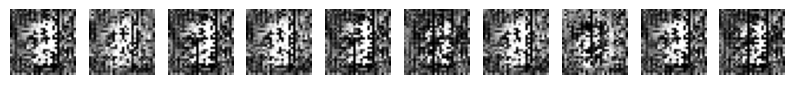

disc_loss 0.028548371 gen_loss 6.506073 ssim -0.016034618
disc_loss 0.0429949723 gen_loss 6.46750689 ssim 0.0774257854
disc_loss 0.0264152903 gen_loss 6.42114925 ssim 0.0953692347
disc_loss 0.0367350504 gen_loss 6.33442259 ssim 0.0107483985
disc_loss 0.0317289867 gen_loss 6.2435174 ssim 0.0612791777
disc_loss 0.0404479653 gen_loss 5.94817638 ssim 0.105569221
disc_loss 0.04600453 gen_loss 6.53703928 ssim 0.0714496
disc_loss 0.0392986275 gen_loss 6.66573143 ssim 0.0772894621
disc_loss 0.0418203399 gen_loss 6.11192942 ssim 0.767375708
disc_loss 0.0232507065 gen_loss 6.95985603 ssim 0.116458513
disc_loss 0.0409023538 gen_loss 6.42781639 ssim -0.00630834419
disc_loss 0.0529743 gen_loss 6.65483952 ssim 0.282633573
disc_loss 0.0902704 gen_loss 6.34125137 ssim 0.372192621
disc_loss 0.0239974 gen_loss 7.07445049 ssim 0.0292629637
disc_loss 0.0346650556 gen_loss 6.86910963 ssim 0.241390631
disc_loss 0.0282893069 gen_loss 6.83283281 ssim 0.197976485
disc_loss 0.0214214623 gen_loss 6.90582705 ssim

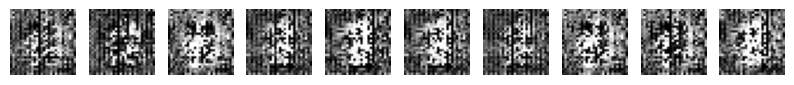

disc_loss 0.0242954157 gen_loss 6.56415415 ssim 0.0848843604
disc_loss 0.0579724424 gen_loss 7.13135 ssim -0.00492809713
disc_loss 0.0441455096 gen_loss 6.80102158 ssim 0.242334172
disc_loss 0.0416770428 gen_loss 6.69743109 ssim 0.566051126
disc_loss 0.0234263856 gen_loss 6.71372843 ssim 0.0534645133
disc_loss 0.030595094 gen_loss 6.72681284 ssim 0.241956085
disc_loss 0.0591705628 gen_loss 6.31756544 ssim 0.360981703
disc_loss 0.0495124161 gen_loss 6.49541 ssim 0.0021334351
disc_loss 0.0486931 gen_loss 6.7549839 ssim 0.317170322
disc_loss 0.0956905186 gen_loss 6.56357384 ssim 0.0883238763
disc_loss 0.0371669 gen_loss 6.36542654 ssim 0.123089336
disc_loss 0.103337839 gen_loss 6.88704967 ssim 0.125650108
disc_loss 0.0607483871 gen_loss 6.62777948 ssim 0.364856541
disc_loss 0.0246777534 gen_loss 6.44401264 ssim 0.248476267
disc_loss 0.0391516201 gen_loss 5.72555923 ssim 0.0460632034
disc_loss 0.0258298963 gen_loss 6.28668642 ssim 0.258738667
disc_loss 0.0308756195 gen_loss 6.52049208 ssim

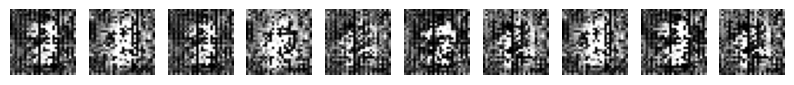

disc_loss 0.063644439 gen_loss 6.54050827 ssim 0.29496482
disc_loss 0.0402552523 gen_loss 6.44684887 ssim 0.125370473
disc_loss 0.0413171127 gen_loss 6.22288561 ssim 0.539558828
disc_loss 0.0174531415 gen_loss 6.39095879 ssim 0.445092499
disc_loss 0.0576244071 gen_loss 6.10007334 ssim 0.152645037
disc_loss 0.0414638482 gen_loss 6.78116322 ssim 0.0210805926
disc_loss 0.0562574267 gen_loss 7.13884544 ssim 0.0228151288
disc_loss 0.0273057856 gen_loss 6.60780811 ssim 0.0866518468
disc_loss 0.0282790065 gen_loss 6.57279 ssim 0.618055701
disc_loss 0.0661119223 gen_loss 6.63864946 ssim 0.121144556
disc_loss 0.0243899766 gen_loss 6.35695553 ssim 0.0272793733
disc_loss 0.0674180612 gen_loss 6.30014944 ssim 0.204684347
disc_loss 0.0407205299 gen_loss 6.34146833 ssim 0.529949367
disc_loss 0.0213286765 gen_loss 6.6431489 ssim 0.0869411826
disc_loss 0.0467248484 gen_loss 5.88755655 ssim 0.310665339
disc_loss 0.0590326041 gen_loss 6.1169 ssim 0.282007456
disc_loss 0.0710713 gen_loss 6.06436396 ssim 

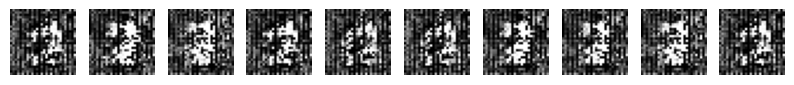

disc_loss 0.0509691946 gen_loss 6.22660542 ssim 0.0508717969
disc_loss 0.189604461 gen_loss 6.69268513 ssim 0.299544692
disc_loss 0.0809438601 gen_loss 6.19769239 ssim 0.12285918
disc_loss 0.0457758121 gen_loss 6.3392849 ssim 0.194137618
disc_loss 0.100559682 gen_loss 6.11524105 ssim 0.330293179
disc_loss 0.0894061327 gen_loss 6.21737909 ssim 0.338471234
disc_loss 0.0807792768 gen_loss 5.86103821 ssim 0.272935897
disc_loss 0.060804002 gen_loss 6.4584837 ssim 0.451289982
disc_loss 0.0658660233 gen_loss 6.50772953 ssim 0.334248692
disc_loss 0.0459555089 gen_loss 6.14612532 ssim 0.37613529
disc_loss 0.0949464589 gen_loss 6.08658648 ssim 0.249717474
disc_loss 0.0616536513 gen_loss 5.80008316 ssim 0.090102233
disc_loss 0.0601434335 gen_loss 6.49954605 ssim 0.20370917
disc_loss 0.0690607 gen_loss 6.35880661 ssim 0.271386325
disc_loss 0.080428496 gen_loss 6.37848568 ssim 0.135091245
disc_loss 0.106847301 gen_loss 6.81421089 ssim 0.0591284633
disc_loss 0.0325105451 gen_loss 6.00624704 ssim 0.1

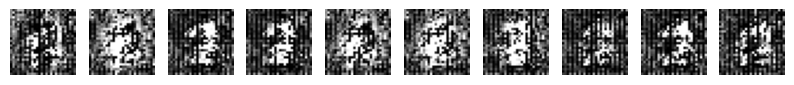

disc_loss 0.0525244474 gen_loss 5.16833925 ssim 0.255717367
disc_loss 0.129728794 gen_loss 5.83204937 ssim 0.179883882
disc_loss 0.10581436 gen_loss 5.62629461 ssim 0.0328274779
disc_loss 0.0606492236 gen_loss 6.04645443 ssim 0.0939296857
disc_loss 0.0660602152 gen_loss 6.02640152 ssim 0.057619594
disc_loss 0.0442738 gen_loss 6.19802141 ssim 0.07635355
disc_loss 0.0977594331 gen_loss 6.33514118 ssim 0.518830359
disc_loss 0.0980281 gen_loss 6.58014536 ssim 0.288113117
disc_loss 0.03562776 gen_loss 6.4384284 ssim 0.121368602
disc_loss 0.0747774318 gen_loss 6.22659254 ssim 0.0877115354


In [ ]:
#@tf.function
def train_step(images, labels,num_unrolling_steps):
    batch_size = images.shape[0]
    noise = tf.random.normal([batch_size, 100])


    generated_images = generator([noise, labels], training=True)
    real_output = discriminator([images, labels], training=True)
    fake_output = discriminator([generated_images, labels], training=True)
    disc_loss = discriminator_loss(real_output, fake_output)
    gen_loss = generator_loss(fake_output)


    for _ in range(num_unrolling_steps if disc_loss>.5 else 1):
        test = tf.expand_dims(images, axis=-1)
        loss = disc_loss.numpy()
        modiy = (.5-np.clip(loss,0,.5))*2
        GaussianPerlinNoiseLayer = AddNoiseLayer(.5, modiy)
        test = GaussianPerlinNoiseLayer(test,training=True)

        with tf.GradientTape() as disc_tape:

            generated_images = generator([noise, labels], training=True)

            real_output = discriminator([test, labels], training=True)
            fake_output = discriminator([generated_images, labels], training=True)

            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    with tf.GradientTape() as gen_tape:
        generated_images = generator([noise, labels], training=True)
        fake_output = discriminator([generated_images, labels], training=True)
        ssim = compute_ssim(generated_images[:5])
        
        gen_loss = generator_loss(fake_output)
        #gen_loss += ssim
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))



    tf.print("disc_loss",disc_loss,'gen_loss',gen_loss,'ssim',ssim)
def train(generator, discriminator, gan, epochs, batch_size,num_unrolling_steps):
    for epoch in range(epochs):
        for batch in range(len(x_train2) // batch_size):
            images = x_train2[batch * batch_size: (batch+1) * batch_size]
            labels = y_train2[batch * batch_size: (batch+1) * batch_size]

            train_step(images, labels,num_unrolling_steps)

        # Output training progress
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}")
            # Generate and save sample images
            noise = tf.random.normal([10, 100])
            sampled_labels = tf.constant([[i % 10] for i in range(10)], dtype=tf.int32)
            generated_images = generator.predict([noise, sampled_labels])
            #generated_images = np.clip(generated_images,0,1)#(generated_images * 0.5) + 0.5  # Rescale images from [-1, 1] to [0, 1]
            fig, axs = plt.subplots(1, 10, figsize=(10, 10))
            for i in range(10):
                axs[i].imshow(generated_images[i], cmap="gray")
                axs[i].axis("off")
            plt.show()

# Train the GAN
EPOCHS = 20000
BATCH_SIZE = 100
num_unrolling_steps = 5  # Set the desired number of unrolling steps
train(generator, discriminator, gan, EPOCHS, BATCH_SIZE,num_unrolling_steps=num_unrolling_steps)